In [33]:
#0. CASO 5: CARGAR LIBRERIAS

import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt
!pip install seaborn
!pip install shap
import seaborn as sns
import numpy as np

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
#1. CARGAR DE DATOS
df = pd.read_csv(r"C:\Users\Usuario\Desktop\Prueba8 DMC MLE\DMC_MLE_GB-1\taller2_MLE.csv")
df['rango_ingresos'] = df['rango_ingresos'].replace('Muy Alto', 'Muy_Alto')
df_proceso = df.copy()
df

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy_Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,Estándar,12464.23,5,4,1,0,3,2.8,27.93,Bajo,Costa,0
4996,58,Preferente,18939.17,5,3,1,1,0,2.1,34.95,Bajo,Selva,0
4997,30,Estándar,51162.08,3,3,0,1,0,2.3,35.58,Muy_Alto,Sierra,0
4998,58,Estándar,14282.38,1,9,0,0,0,2.0,44.67,Medio,Selva,1


In [35]:
df['cerrara_cuenta'].value_counts(normalize=True)

cerrara_cuenta
0    0.8596
1    0.1404
Name: proportion, dtype: float64

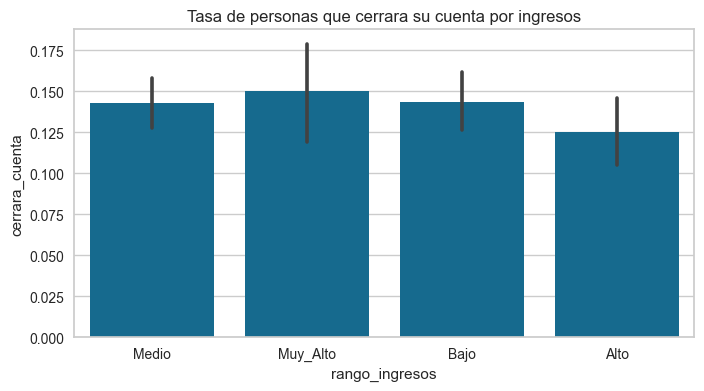

In [36]:
#2.ANALISIS EXPLORATORIO; CTR por plataforma
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='rango_ingresos',y='cerrara_cuenta')
plt.title("Tasa de personas que cerrara su cuenta por ingresos")
plt.show()

In [37]:
df['Satisfaccion']=pd.cut(df['satisfaccion_encuesta'],
                                bins=[1,2,3,4,5],
                                labels=['Muy Bajo','Bajo','Medio','Alto'])

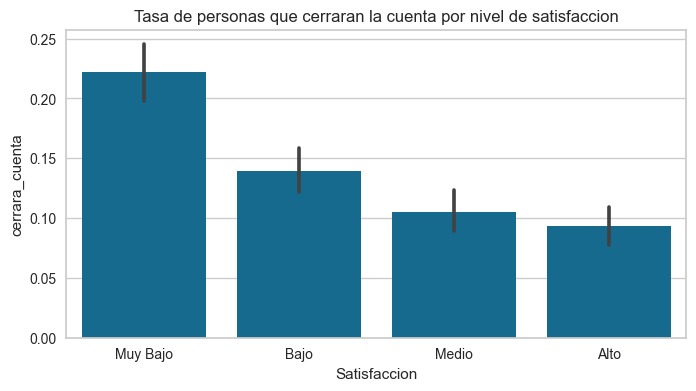

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Satisfaccion',y='cerrara_cuenta')
plt.title("Tasa de personas que cerraran la cuenta por nivel de satisfaccion")
plt.show()

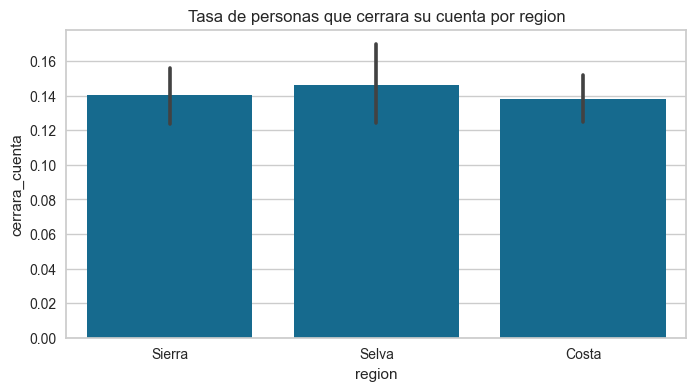

In [39]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='region',y='cerrara_cuenta')
plt.title("Tasa de personas que cerrara su cuenta por region")
plt.show()

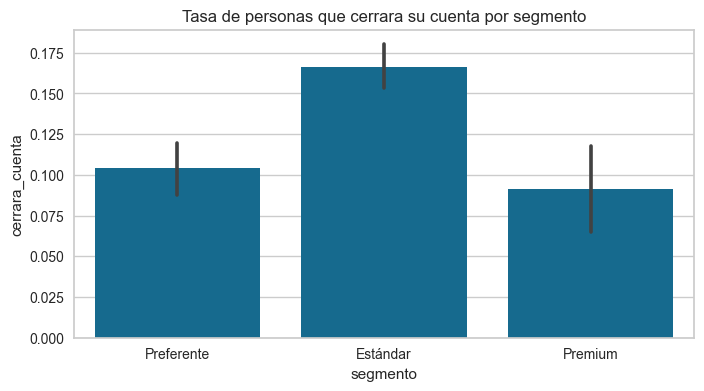

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='segmento',y='cerrara_cuenta')
plt.title("Tasa de personas que cerrara su cuenta por segmento")
plt.show()

In [41]:
df['reclamos_6m'].min()

0

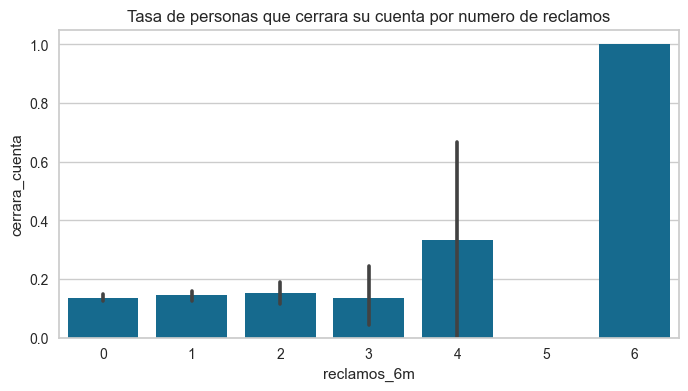

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='reclamos_6m',y='cerrara_cuenta')
plt.title("Tasa de personas que cerrara su cuenta por numero de reclamos")
plt.show()

In [43]:
df['edad'].min()

18

In [44]:
df['Grupo Etario']=pd.cut(df['edad'],
                                bins=[18,29,45,55,60,74],
                                labels=['Joven','Adulto Temprano','Adulto Medio','Adulto Mayor', 'Anciano'])

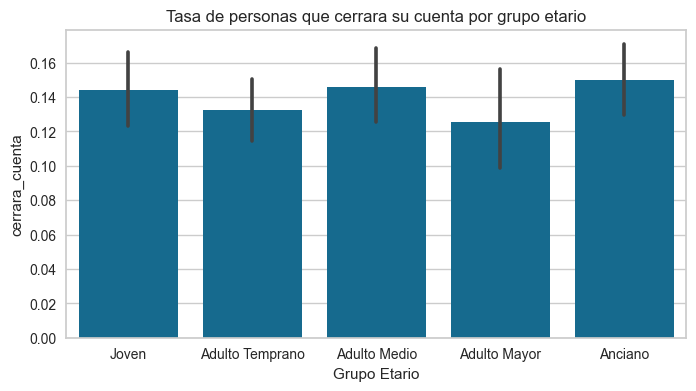

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Grupo Etario',y='cerrara_cuenta')
plt.title("Tasa de personas que cerrara su cuenta por grupo etario")
plt.show()

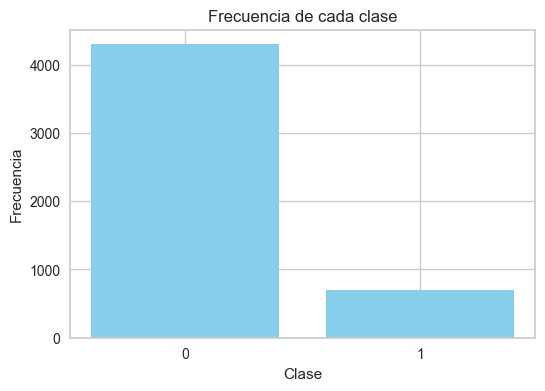

In [46]:
df['cerrara_cuenta'] = df['cerrara_cuenta'].astype(str)
frecuencias = df['cerrara_cuenta'].value_counts()
# Crear la gráfica de barras
plt.figure(figsize=(6,4))
plt.bar(frecuencias.index, frecuencias.values, color='skyblue')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada clase')
plt.show()

In [47]:
df_proceso

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy_Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,Estándar,12464.23,5,4,1,0,3,2.8,27.93,Bajo,Costa,0
4996,58,Preferente,18939.17,5,3,1,1,0,2.1,34.95,Bajo,Selva,0
4997,30,Estándar,51162.08,3,3,0,1,0,2.3,35.58,Muy_Alto,Sierra,0
4998,58,Estándar,14282.38,1,9,0,0,0,2.0,44.67,Medio,Selva,1


In [48]:
df_proceso['rango_ingresos'].unique()

array(['Medio', 'Muy_Alto', 'Bajo', 'Alto'], dtype=object)

In [80]:
#4.PYCARET: SETUP CON TÉNICAS AVANZADAS

clf=setup(data=df_proceso,
          target='cerrara_cuenta',
          session_id=123,
          categorical_features=['usa_tarjeta_credito','usa_web','region','rango_ingresos', 'segmento'],
          normalize=True,
          feature_selection=True,
          remove_multicollinearity=True,
          transformation=True,
          transformation_method='yeo-johnson',
          fold = 10,
          fold_strategy='stratifiedkfold')

,Description,Value
0,Session id,123
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(5000, 3)"
5,Transformed train set shape,"(3500, 3)"
6,Transformed test set shape,"(1500, 3)"
7,Numeric features,7
8,Categorical features,5
9,Preprocess,True


In [90]:
#5. COMPARAR MODELO POR F1 (CONVERSION ES EVENTO RARO)
best = compare_models(sort='Recall')
best

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:24:27
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7511,0.4937,0.1383,0.1335,0.1348,-0.0094,-0.0094,0.2630
et,Extra Trees Classifier,0.8263,0.4901,0.0611,0.1759,0.0895,0.0169,0.0209,0.4300
rf,Random Forest Classifier,0.8363,0.4737,0.0366,0.1605,0.0589,0.0052,0.0082,0.5720
knn,K Neighbors Classifier,0.8411,0.4974,0.0244,0.1410,0.0410,-0.0017,-0.0014,0.2730
lightgbm,Light Gradient Boosting Machine,0.8514,0.4838,0.0102,0.1183,0.0187,-0.0019,-0.0050,0.3470
lr,Logistic Regression,0.8597,0.5221,0.0000,0.0000,0.0000,0.0000,0.0000,0.2350
nb,Naive Bayes,0.8597,0.5221,0.0000,0.0000,0.0000,0.0000,0.0000,0.2640
svm,SVM - Linear Kernel,0.8597,0.5331,0.0000,0.0000,0.0000,0.0000,0.0000,0.2360
ridge,Ridge Classifier,0.8597,0.5221,0.0000,0.0000,0.0000,0.0000,0.0000,0.2320
qda,Quadratic Discriminant Analysis,0.8597,0.5205,0.0000,0.0000,0.0000,0.0000,0.0000,0.2400


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [82]:
#6.AJUSTE FINO Y VISUALIZACION
final = tune_model(best,optimize='F1')
# plot_model(final,plot='pr') #Precision-Recall
# plot_model(final,plot='confusion_matrix')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.5253,0.0408,0.1333,0.0625,-0.0033,-0.0041
1,0.8314,0.4689,0.0204,0.0833,0.0328,-0.0236,-0.0308
2,0.8457,0.4818,0.0204,0.1429,0.0357,0.0007,0.0012
3,0.8429,0.4662,0.0000,0.0000,0.0000,-0.0315,-0.0533
4,0.8171,0.4840,0.0204,0.0588,0.0303,-0.0451,-0.0529
5,0.8314,0.5227,0.0204,0.0833,0.0328,-0.0236,-0.0308
6,0.8371,0.4585,0.0204,0.1000,0.0339,-0.0142,-0.0198
7,0.8457,0.5380,0.0000,0.0000,0.0000,-0.0266,-0.0486
8,0.8286,0.4805,0.0204,0.0769,0.0323,-0.0281,-0.0357


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [83]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7229,0.4886,0.1633,0.1250,0.1416,-0.0202,-0.0204
1,0.7400,0.4729,0.1020,0.0962,0.0990,-0.0528,-0.0528
2,0.7143,0.4822,0.1633,0.1194,0.1379,-0.0284,-0.0289
3,0.7486,0.4694,0.0816,0.0851,0.0833,-0.0623,-0.0623
4,0.7457,0.4848,0.1224,0.1154,0.1188,-0.0296,-0.0296
5,0.7600,0.4831,0.1020,0.1111,0.1064,-0.0319,-0.0320
6,0.7657,0.4921,0.1224,0.1333,0.1277,-0.0074,-0.0074
7,0.7943,0.5202,0.1429,0.1892,0.1628,0.0481,0.0487
8,0.7400,0.4900,0.1429,0.1250,0.1333,-0.0188,-0.0189


In [ ]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [85]:
preds = predict_model(dt)
preds.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7727,0.5262,0.1848,0.1875,0.1862,0.0540,0.0540


,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta,prediction_label,prediction_score
967,56,Preferente,39279.359375,1,6,1,0,1,2.7,46.000000,Medio,Costa,0,0,1.0
2627,42,Estándar,10228.000000,2,8,1,1,3,4.9,45.000000,Bajo,Costa,0,0,1.0
3918,34,Preferente,19100.460938,2,10,0,0,0,2.0,36.279999,Bajo,Sierra,0,0,1.0
2197,66,Estándar,21847.210938,1,7,0,0,0,2.2,26.440001,Alto,Costa,0,0,1.0
4642,26,Premium,26143.560547,1,10,1,1,0,1.1,23.660000,Medio,Costa,0,0,1.0


In [86]:
df_proceso.select_dtypes(include='number').corr()['cerrara_cuenta'].sort_values(ascending=False)

cerrara_cuenta           1.000000
reclamos_6m              0.024427
usa_tarjeta_credito      0.022564
visitas_app_mes          0.012285
edad                     0.008659
usa_web                 -0.004641
tasa_credito_personal   -0.019942
saldo_total             -0.033003
numero_productos        -0.039085
satisfaccion_encuesta   -0.139740
Name: cerrara_cuenta, dtype: float64

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_proceso['tipo_cliente_num'] = le.fit_transform(df_proceso['tipo_cliente'])
# luego puedes usar 'tipo_cliente_num' en corr

KeyError: 'tipo_cliente'